# <span style="color:darkblue"> Lecture 11: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [4]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [5]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [6]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,242
Treatment,156


col_0,Frequency
status,
Control,0.60804
Treatment,0.39196


<font size = "5">

Query with string conditions

In [7]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [8]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,23.900000,5.346154,187.743590,2930.269231,15.727564
std,7.791815,1.656478,103.586328,844.704364,2.613132
min,11.000000,4.000000,71.000000,1773.000000,9.000000
25%,18.000000,4.000000,105.000000,2213.750000,14.000000
50%,23.900000,4.000000,140.000000,2674.000000,15.500000
75%,30.175000,6.000000,252.000000,3411.250000,17.525000
max,46.600000,8.000000,455.000000,5140.000000,22.100000


,mpg,cylinders,displacement,weight,acceleration
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,23.266116,5.524793,197.090909,2996.309917,15.465289
std,7.837574,1.728875,104.756386,848.955501,2.847572
min,9.000000,3.000000,68.000000,1613.000000,8.000000
25%,17.000000,4.000000,101.750000,2229.500000,13.525000
50%,22.150000,4.500000,156.000000,2870.000000,15.400000
75%,28.000000,8.000000,302.000000,3641.750000,17.000000
max,44.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


In [9]:
carfeatures = pd.read_csv("data_raw/features.csv")

<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [10]:
data  = pd.DataFrame()
data["age"] = [18,29,15,32,6]

def fn_agebracket(age):
    if (age >= 18):
        status = "Adult"
    elif (age >= 10) & (age < 18):
        status = "Adolescent"
    else:
        status = "Child"
    return(status)

data["age_bracket"] = data["age"].apply(fn_agebracket)
data

,age,age_bracket
0,18,Adult
1,29,Adult
2,15,Adolescent
3,32,Adult
4,6,Child


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [11]:
dataset = pd.DataFrame()
n = 50
np.random.seed(42)
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)

xbar = dataset['x'].mean()
xmedian = dataset['x'].median()
stdv_sample = dataset['x'].std()

subset = dataset.query('(abs(x - @xbar) <= @stdv_sample) and (x<= 4)')

<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [12]:
carfeatures = pd.read_csv("data_raw/features.csv")
carsorted = carfeatures.sort_values(by = "mpg", ascending = False)
display(carsorted.iloc[0,:])

mpg                  46.6
cylinders               4
displacement           86
horsepower             65
weight               2110
acceleration         17.9
vehicle_id      M-1693322
Name: 322, dtype: object

<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [13]:
list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status, 
                                         size = size_dataset, p = prop_status)

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')



<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [14]:
print(np.log(1))
print(np.exp(1))
print(np.sin(1))
print(np.cos(1))
print(np.sqrt(1))

def f(y, x, b0, b1):
    return dataset.mean()

f(3,2,1,4)


0.0
2.718281828459045
0.8414709848078965
0.5403023058681398
1.0


x   -0.225474
dtype: float64

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

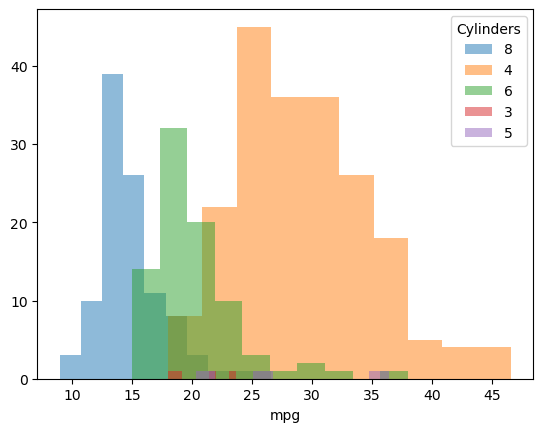

In [16]:
list_unique_cylinders = pd.unique(carfeatures["cylinders"])
for category in list_unique_cylinders:
    df   = carfeatures.query("cylinders == @category")
    plt.hist(x = df["mpg"],alpha = 0.5)

plt.xlabel("mpg")
plt.legend(labels = list_unique_cylinders,
           title  = "Cylinders")
plt.show()